In [63]:
import numpy as np
from scipy.signal import argrelextrema
import pandas as pd
import scipy.signal as signal
import matplotlib.pyplot as plt

In [64]:
df = pd.read_csv ('../data/bitcoin.csv')

#df.set_index('Date', inplace=True)

#df.index = pd.to_datetime(df.index)

df = df.drop('Volume', axis=1)

#df = df.rename (columns= {'Adj Close' : 'close' }) 

df_precios = pd.DataFrame (df ['Adj Close']).rename(columns={'Adj Close': 'close'})

df

,Date,Adj Close
0,2014-09-17,457.334015
1,2014-09-18,424.440002
2,2014-09-19,394.795990
3,2014-09-20,408.903992
4,2014-09-21,398.821014
...,...,...
3479,2024-03-27,69455.343750
3480,2024-03-28,70744.953125
3481,2024-03-29,69892.828125
3482,2024-03-30,69645.304688


## fechas a buscar:

7-dic-2023 //  6 feb 2024
13 feb 2024 // 26 feb 2024

18 marz 2023 // 28 oct 2023

22 nov 2019 // 14 enero 2020

In [65]:
df_filtrado_1 = df.loc[(df['Date'] >= '2023-12-07') & (df['Date'] <= '2024-02-6')]
df_filtrado_2 = df.loc[(df['Date'] >= '2024-02-01') & (df['Date'] <= '2024-02-27')]
df_filtrado_3 = df.loc[(df['Date'] >= '2023-03-18') & (df['Date'] <= '2023-10-28')]
df_filtrado_4 = df.loc[(df['Date'] >= '2019-11-22') & (df['Date'] <= '2020-01-14')]
# Mostrar el DataFrame resultante
print(type (df_filtrado_1))

<class 'pandas.core.frame.DataFrame'>


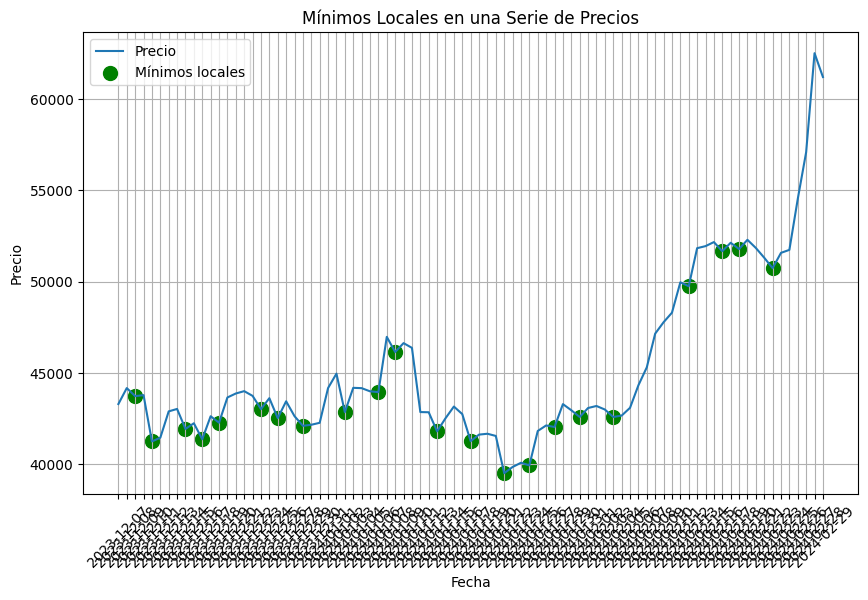

In [66]:
local_min_indices = signal.argrelextrema(df_filtrado_1['Adj Close'].values, np.less)[0]

# Graficar los datos y marcar los mínimos locales encontrados


plt.figure(figsize=(10, 6))
plt.plot(df_filtrado_1['Date'], df_filtrado_1['Adj Close'], label='Precio')
plt.scatter(df_filtrado_1.iloc[local_min_indices]['Date'], df_filtrado_1.iloc[local_min_indices]['Adj Close'],
            color='green', label='Mínimos locales', s=100, marker='o')
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.title('Mínimos Locales en una Serie de Precios')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

In [67]:
todo_1 = df_filtrado_1.iloc [local_min_indices] 

print (todo_1)

            Date     Adj Close
3370  2023-12-09  43725.984375
3372  2023-12-11  41243.832031
3376  2023-12-15  41929.757812
3378  2023-12-17  41364.664062
3380  2023-12-19  42270.527344
3385  2023-12-24  43016.117188
3387  2023-12-26  42520.402344
3390  2023-12-29  42099.402344
3395  2024-01-03  42848.175781
3399  2024-01-07  43943.097656
3401  2024-01-09  46139.730469
3406  2024-01-14  41796.269531
3410  2024-01-18  41262.058594
3414  2024-01-22  39507.367188
3417  2024-01-25  39933.808594
3420  2024-01-28  42035.593750
3423  2024-01-31  42582.605469
3427  2024-02-04  42583.582031
3436  2024-02-13  49742.441406
3440  2024-02-17  51662.996094
3442  2024-02-19  51779.144531
3446  2024-02-23  50731.949219


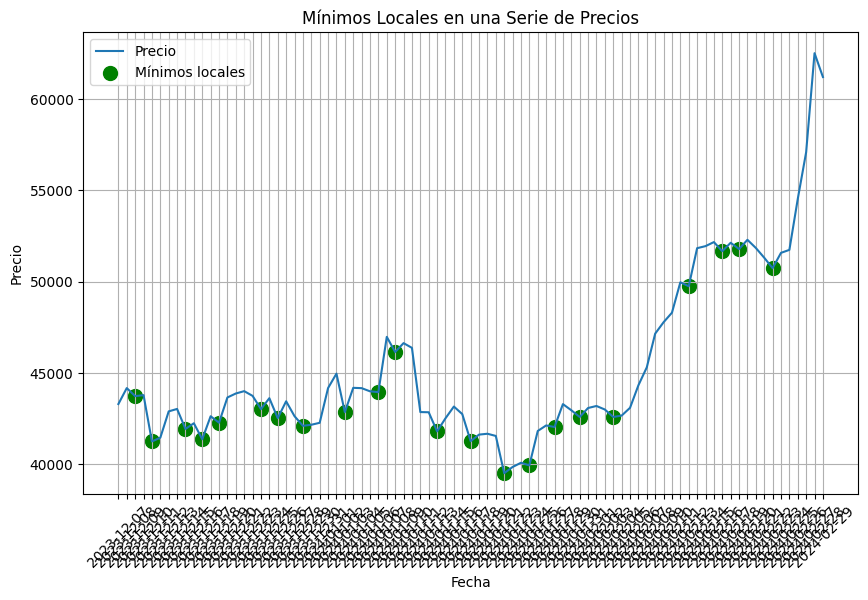

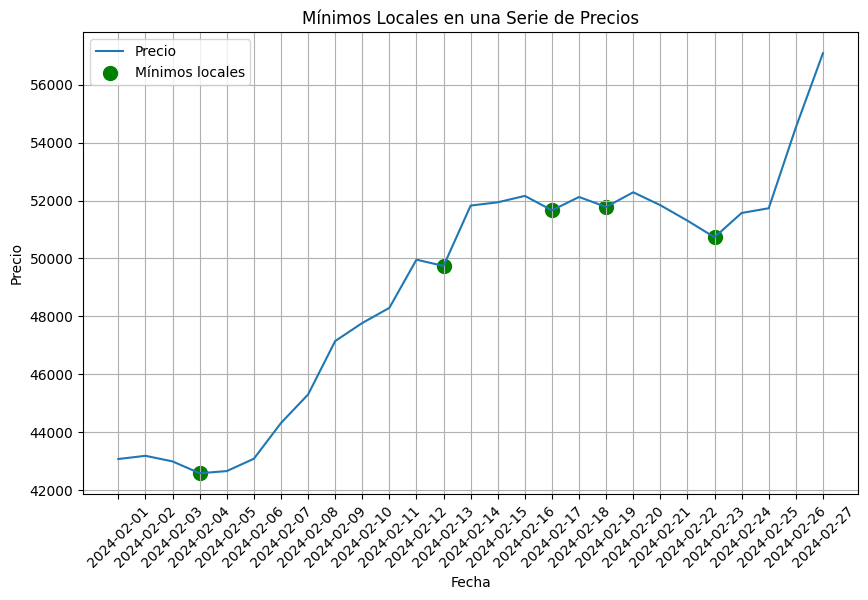

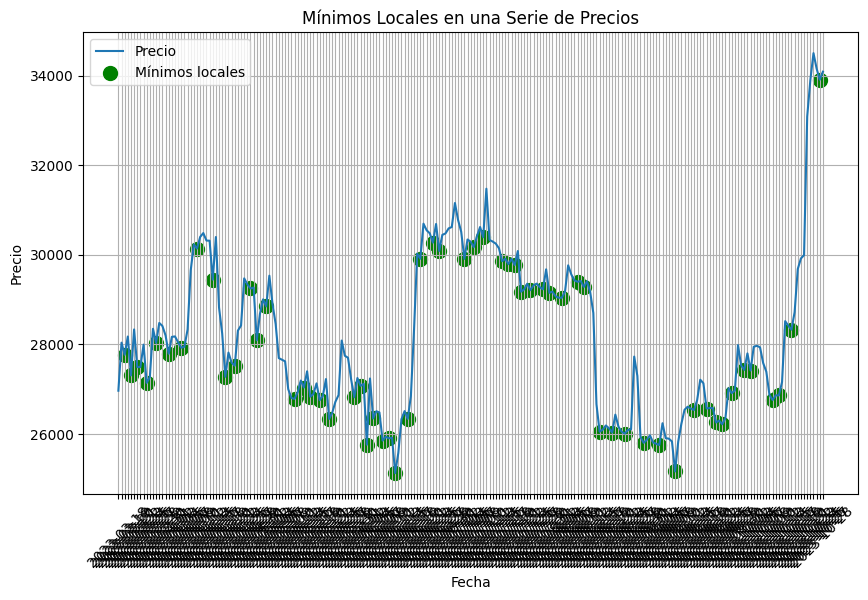

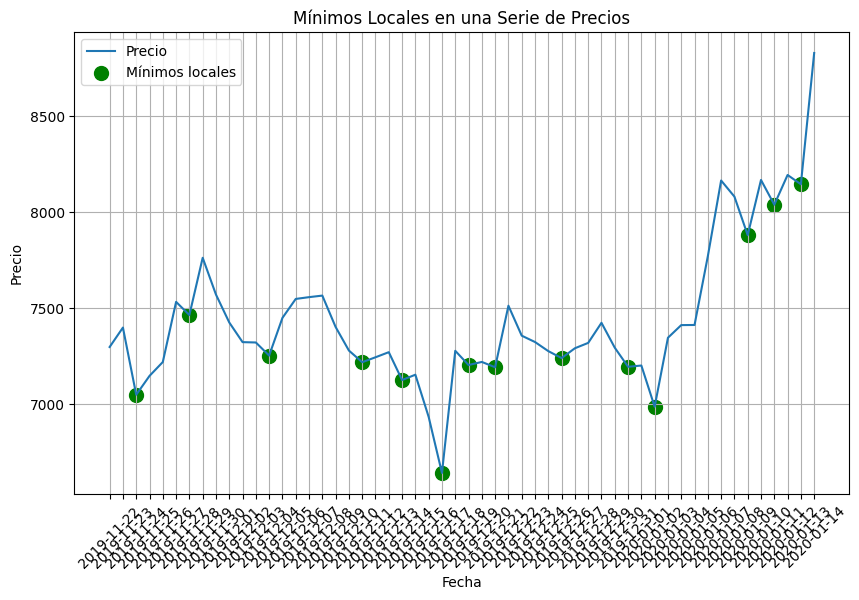

In [68]:
def plot_local_minima(df):
    """
    Función para graficar mínimos locales en una serie de precios.

    Args:
    - df (DataFrame): DataFrame que contiene la serie de precios con columnas 'Date' y 'Adj Close'.
    """
    # Encontrar los índices de los mínimos locales
    local_min_indices = signal.argrelextrema(df['Adj Close'].values, np.less)[0]
    #smooth_prices = df['Adj Close'].rolling(window=smoothing).mean().dropna()
    # Graficar los datos y marcar los mínimos locales
    plt.figure(figsize=(10, 6))
    plt.plot(df['Date'], df['Adj Close'], label='Precio')
    plt.scatter(df.iloc[local_min_indices]['Date'], df.iloc[local_min_indices]['Adj Close'],
                color='green', label='Mínimos locales', s=100, marker='o')
    plt.xlabel('Fecha')
    plt.ylabel('Precio')
    plt.title('Mínimos Locales en una Serie de Precios')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.show()

# Llama a la función plot_local_minima con tu DataFrame como argumento
plot_local_minima(df_filtrado_1)
plot_local_minima(df_filtrado_2)
plot_local_minima(df_filtrado_3)
plot_local_minima(df_filtrado_4)

#### OTRAS MOVIDAS

oscilador VHF (filtro horizontal vertical), que te da la relación entre la amplitud horizontal y vertical del precio


#### otras estrategias

High tight Flag, episodic pivot y VCPS


In [69]:
df = pd.read_csv  ('btc_dia.csv')
df

FileNotFoundError: [Errno 2] No such file or directory: 'btc_dia.csv'

In [ ]:
def detect_support_resistance(df, window=20):
    df['Rolling High'] = df['High'].rolling(window=window).max()
    df['Rolling Low'] = df['Low'].rolling(window=window).min()
    df['Rolling Mean'] = df['Price'].rolling(window=window).mean()
    return df

detect_support_resistance (df)

,Date,Price,Open,High,Low,Vol_BTC,Vol_USD,Rolling High,Rolling Low,Rolling Mean
0,2024-03-18,67594,68389,68920,66601,78070.0,"5,277,063,580",NaN,NaN,NaN
1,2024-03-17,68391,65314,68857,64605,66070.0,"4,518,593,370",NaN,NaN,NaN
2,2024-03-16,65314,69456,70037,64971,75820.0,"4,952,107,480",NaN,NaN,NaN
3,2024-03-15,69463,71387,72398,65765,148590.0,"10,321,507,170",NaN,NaN,NaN
4,2024-03-14,71387,73066,73740,68717,109430.0,"7,811,879,410",NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
4269,2011-06-07,23,18,24,18,53720.0,"1,235,560",31.0,10.0,18.80
4270,2011-06-06,18,16,19,16,55090.0,"991,620",31.0,10.0,18.90
4271,2011-06-05,16,18,19,16,24280.0,"388,480",31.0,10.0,18.85
4272,2011-06-04,18,14,18,14,44480.0,"800,640",31.0,10.0,18.90


In [1]:
def detect_support_resistance(df, window=20):
    df['Rolling High'] = df['High'].rolling(window=window).max()
    df['Rolling Low'] = df['Low'].rolling(window=window).min()
    df['Rolling Mean'] = df['Price'].rolling(window=window).mean()
    return df

# Aplicar la función para detectar soporte y resistencia
df = detect_support_resistance(df)

# Crear el gráfico
plt.figure(figsize=(12, 6))

# Graficar los precios
plt.plot(df['Date'], df['Price'], label='Precio', color='blue')

# Graficar los niveles de soporte y resistencia
plt.plot(df['Date'], df['Rolling High'], label='Resistencia', linestyle='--', color='red')
plt.plot(df['Date'], df['Rolling Low'], label='Soporte', linestyle='--', color='green')

# Graficar la media móvil
plt.plot(df['Date'], df['Rolling Mean'], label='Media Móvil', linestyle='--', color='orange')

# Etiquetas y leyenda
plt.title('Niveles de Soporte y Resistencia')
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.legend()

# Mostrar el gráfico
plt.grid(True)
plt.show()

NameError: name 'df' is not defined

In [ ]:
df = df.head (100)
df

,Date,Price,Open,High,Low,Vol_BTC,Vol_USD,Rolling High,Rolling Low,Rolling Mean
0,2024-03-18,67594,68389,68920,66601,78070.0,"5,277,063,580",NaN,NaN,NaN
1,2024-03-17,68391,65314,68857,64605,66070.0,"4,518,593,370",NaN,NaN,NaN
2,2024-03-16,65314,69456,70037,64971,75820.0,"4,952,107,480",NaN,NaN,NaN
3,2024-03-15,69463,71387,72398,65765,148590.0,"10,321,507,170",NaN,NaN,NaN
4,2024-03-14,71387,73066,73740,68717,109430.0,"7,811,879,410",NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
95,2023-12-14,43025,42886,43392,41591,59150.0,"2,544,928,750",45885.0,40554.0,42971.05
96,2023-12-13,42884,41487,43417,40649,63110.0,"2,706,409,240",44394.0,40554.0,42868.10
97,2023-12-12,41487,41256,42070,40691,57040.0,"2,366,418,480",44394.0,40554.0,42733.30
98,2023-12-11,41256,43791,43806,40277,105190.0,"4,339,718,640",44394.0,40277.0,42682.50


C:\Users\pobla\AppData\Local\Temp\ipykernel_18780\2606805639.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Rolling High'] = df['High'].rolling(window=window).max()
C:\Users\pobla\AppData\Local\Temp\ipykernel_18780\2606805639.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Rolling Low'] = df['Low'].rolling(window=window).min()
C:\Users\pobla\AppData\Local\Temp\ipykernel_18780\2606805639.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usi

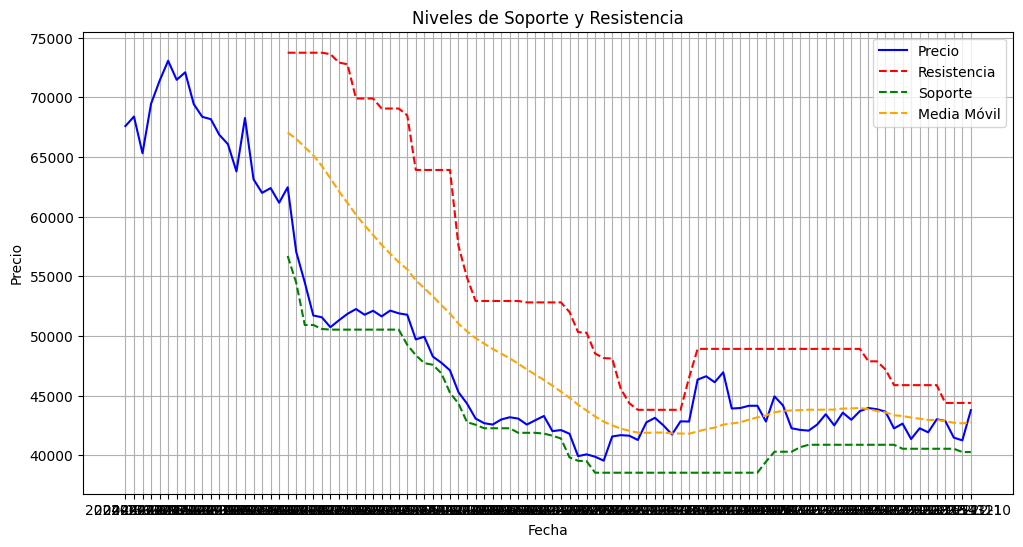

In [ ]:
df = detect_support_resistance(df)

# Crear el gráfico
plt.figure(figsize=(12, 6))

# Graficar los precios
plt.plot(df['Date'], df['Price'], label='Precio', color='blue')

# Graficar los niveles de soporte y resistencia
plt.plot(df['Date'], df['Rolling High'], label='Resistencia', linestyle='--', color='red')
plt.plot(df['Date'], df['Rolling Low'], label='Soporte', linestyle='--', color='green')

# Graficar la media móvil
plt.plot(df['Date'], df['Rolling Mean'], label='Media Móvil', linestyle='--', color='orange')

# Etiquetas y leyenda
plt.title('Niveles de Soporte y Resistencia')
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.legend()

# Mostrar el gráfico
plt.grid(True)
plt.show()

#### OTRAS MOVIDAS

oscilador VHF (filtro horizontal vertical), que te da la relación entre la amplitud horizontal y vertical del precio


#### otras estrategias

High tight Flag, episodic pivot y VCPS


In [ ]:
# Función para identificar rango lateral

def detect_sideways_market(df, window=20, threshold=0.05):
    df = detect_support_resistance(df, window)
    df['Range'] = df['Rolling High'] - df['Rolling Low']
    df['Range Percent'] = df['Range'] / df['Rolling Mean']

    df['Sideways'] = df['Range Percent'] < threshold
    return df


detect_sideways_market (df)


C:\Users\pobla\AppData\Local\Temp\ipykernel_18780\1355646966.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Rolling High'] = df['High'].rolling(window=window).max()
C:\Users\pobla\AppData\Local\Temp\ipykernel_18780\1355646966.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Rolling Low'] = df['Low'].rolling(window=window).min()
C:\Users\pobla\AppData\Local\Temp\ipykernel_18780\1355646966.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usi

,Date,Price,Open,High,Low,Vol_BTC,Vol_USD,Rolling High,Rolling Low,Rolling Mean,Range,Range Percent,Sideways
0,2024-03-18,67594,68389,68920,66601,78070.0,"5,277,063,580",NaN,NaN,NaN,NaN,NaN,False
1,2024-03-17,68391,65314,68857,64605,66070.0,"4,518,593,370",NaN,NaN,NaN,NaN,NaN,False
2,2024-03-16,65314,69456,70037,64971,75820.0,"4,952,107,480",NaN,NaN,NaN,NaN,NaN,False
3,2024-03-15,69463,71387,72398,65765,148590.0,"10,321,507,170",NaN,NaN,NaN,NaN,NaN,False
4,2024-03-14,71387,73066,73740,68717,109430.0,"7,811,879,410",NaN,NaN,NaN,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2023-12-14,43025,42886,43392,41591,59150.0,"2,544,928,750",45885.0,40554.0,42971.05,5331.0,0.124060,False
96,2023-12-13,42884,41487,43417,40649,63110.0,"2,706,409,240",44394.0,40554.0,42868.10,3840.0,0.089577,False
97,2023-12-12,41487,41256,42070,40691,57040.0,"2,366,418,480",44394.0,40554.0,42733.30,3840.0,0.089860,False
98,2023-12-11,41256,43791,43806,40277,105190.0,"4,339,718,640",44394.0,40277.0,42682.50,4117.0,0.096456,False


In [ ]:
sideways_periods = df[df['Sideways']]

print(sideways_periods[['Date', 'Price', 'Rolling High', 'Rolling Low', 'Sideways']])

Empty DataFrame
Columns: [Date, Price, Rolling High, Rolling Low, Sideways]
Index: []


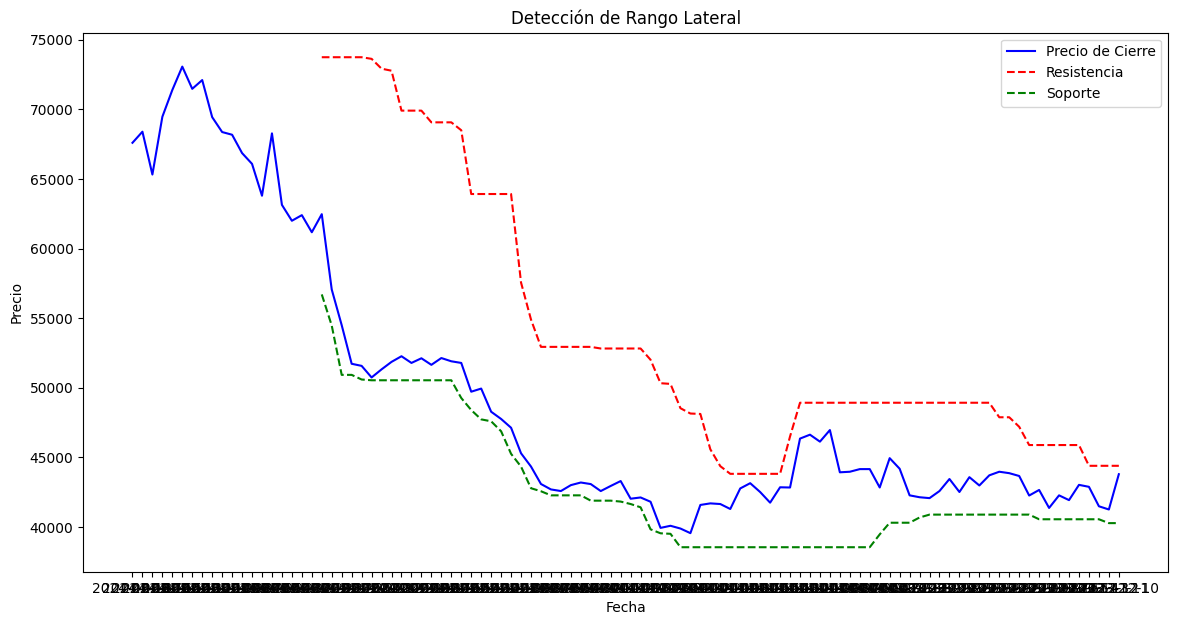

In [ ]:
plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['Price'], label='Precio de Cierre', color='blue')
plt.plot(df['Date'], df['Rolling High'], label='Resistencia', linestyle='--', color='red')
plt.plot(df['Date'], df['Rolling Low'], label='Soporte', linestyle='--', color='green')

# Resaltar los períodos de rango lateral
plt.fill_between(df['Date'], df['Rolling Low'], df['Rolling High'], 
                 where=df['Sideways'], facecolor='gray', alpha=0.5)

plt.title('Detección de Rango Lateral')
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.legend()
plt.show()
